,nombre,geom
0,Parcela 1,"MULTIPOLYGON (((292748.617 4454833.703, 292769..."
1,Parcela 2,"MULTIPOLYGON (((292710.883 4454837.308, 292724..."
2,Parcela 3,"MULTIPOLYGON (((293241.232 4456251.043, 293248..."
3,Parcela 4,"MULTIPOLYGON (((293107.662 4454267.288, 293119..."


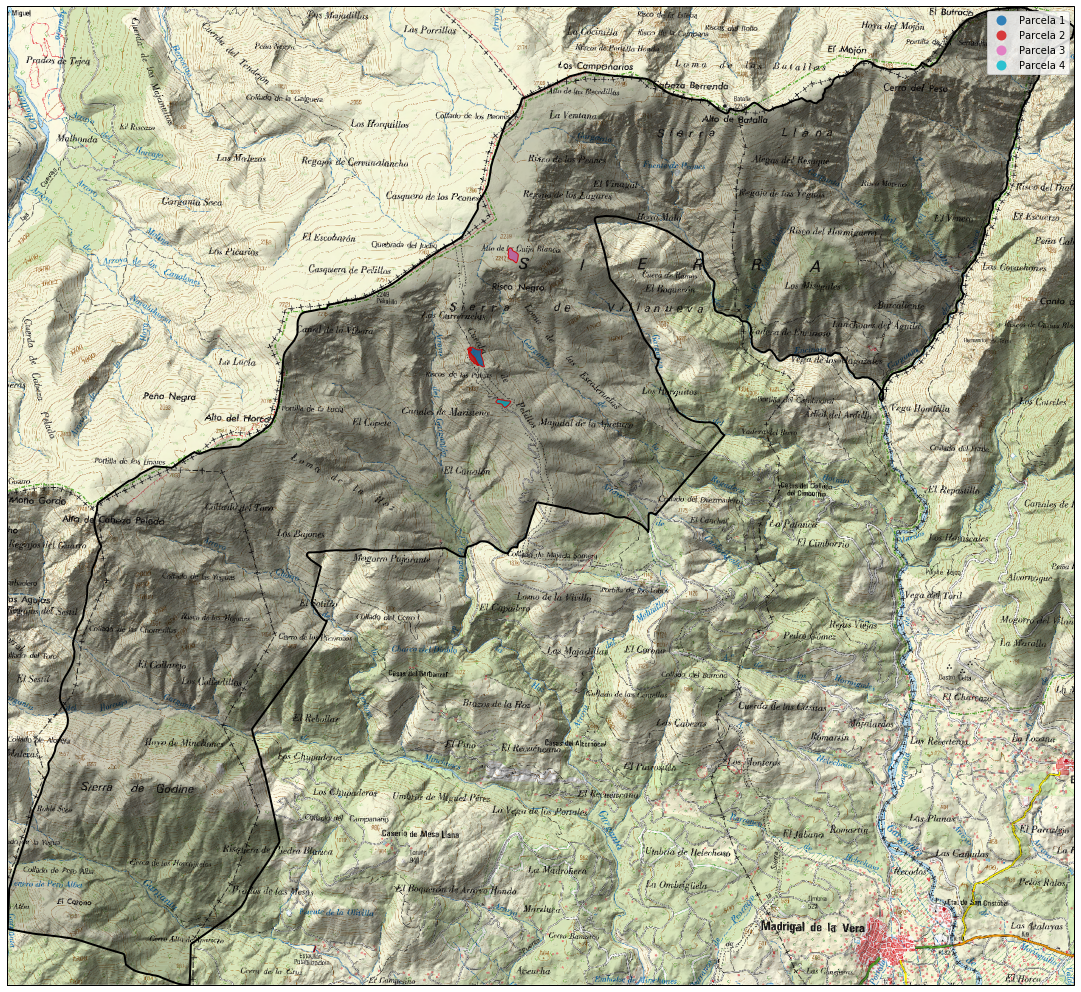

In [1]:
import psycopg2
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from config import config

zona = 'madrigal'
params = config()
conn = psycopg2.connect(**params)

ze = gpd.read_postgis('select * from zona_estudio_{}'.format(zona), conn)
parcelas = gpd.read_postgis('select nombre, st_transform(geom, 25830) as geom from quema_{}_todas'.format(zona), conn)

proj = ccrs.epsg('25830')

fig = plt.figure(figsize=(24,18))
ax = plt.axes(projection=proj)
lim = ze.bounds
ax.set_extent([lim['minx'],lim['maxx'], lim['miny'], lim['maxy']], crs=proj)
ax.add_geometries(ze.loc[[0], 'geom'], facecolor='#00000030', linewidth=2, edgecolor='black', crs=proj)
display(parcelas)
ax.add_wms(wms='https://www.ign.es/wms-inspire/mapa-raster', layers=['mtn_rasterizado'])

parcelas.plot(column=parcelas['nombre'], alpha=0.9, edgecolor='red', linewidth=1, ax=ax, legend=True)

fig.savefig('static/images_quemas/parcelas_{}'.format(zona), bbox_inches='tight', pad_inches=0)
plt.show()
plt.close(fig)

conn.close()